# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

x1 = data1[:,0]
y1 = data1[:,1]
x2 = data2[:,0]
y2 = data2[:,1]

label1 = data1[:,2]
label2 = data2[:,2]

## plot the data

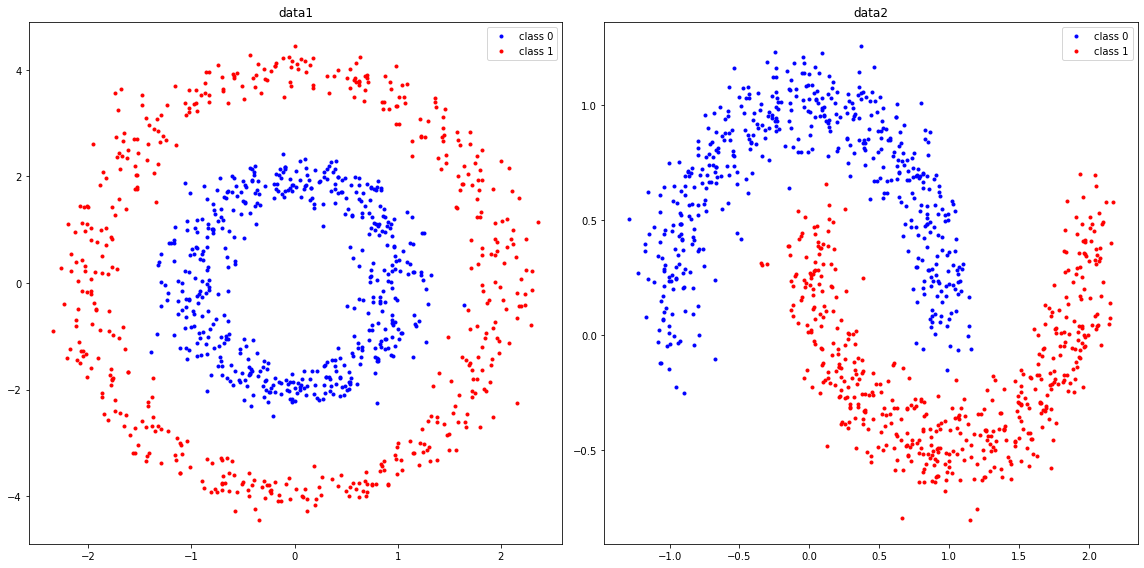

In [3]:
# data 분류
num_data1, num_data2 = data1.shape[0], data2.shape[0]
data1_zero, data1_one = [],[]
data2_zero, data2_one = [],[]

for data in data1:
    if data[2] == 0:
        data1_zero.append(data[:2])
    else:
        data1_one.append(data[:2])
for data in data2:
    if data[2] == 0:
        data2_zero.append(data[:2])
    else:
        data2_one.append(data[:2])
        
data1_zero, data1_one = np.array(data1_zero), np.array(data1_one)
data2_zero, data2_one = np.array(data2_zero), np.array(data2_one)

# plot
plt.figure(figsize=(16,8))

# data1
plt.subplot(121)
plt.plot(data1_zero[:,0], data1_zero[:,1], '.', color = 'blue', label='class 0')
plt.plot(data1_one[:,0], data1_one[:,1], '.', color = 'red', label='class 1')
plt.title('data1')
plt.legend()

# data2
plt.subplot(122)
plt.plot(data2_zero[:,0], data2_zero[:,1], '.', color = 'blue', label='class 0')
plt.plot(data2_one[:,0], data2_one[:,1], '.', color = 'red', label='class 1')
plt.title('data2')

plt.legend()
#plt.axis('equal')
plt.tight_layout()
plt.show()



## define the feature function for each data to obtain the best accuracy

In [4]:
def feature_function1(x, y):
    # point = np.array([[1]*num_data, point_x, point_y])
    feature = np.array([[1]*num_data1, x, y, x*y, x**2, y**2])
    
    return feature

In [5]:
def feature_function2(x, y):

    feature = np.array([[1]*num_data2, x, x**2, x**3, y] )

    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [6]:
def regression_function(theta, feature):

    value = feature.T @ theta

    return value

## define sigmoid function with input $x$

In [7]:
def logistic_function(x):

    z = 1 / (1+np.exp(-x))

    return z

## define loss function with feature and label based on the logistic regression

In [8]:
def compute_loss_feature(theta, feature, label):

    wTx = regression_function(theta, feature)
    h = logistic_function(wTx)
    num_data = feature.shape[1]
    
    loss = -(1/num_data) * np.sum( label*np.log(h) + (np.full(num_data,1)-label)*np.log(np.full(num_data,1)-h) )

    return loss

## define gradient vector for the model parameters $\theta$

In [9]:
def compute_gradient_feature(theta, feature, label):
    
    wTx = regression_function(theta, feature)
    h = logistic_function(wTx)
    num_data = feature.shape[1]
    
    gradient = (1/num_data) * feature@(h-label)
    
    return gradient

## compute the accuracy

In [10]:
def compute_accuracy(theta, feature, label):
    
    tot = len(label)
    r = regression_function(theta, feature)
    pred = []
    e = 0
    for val in r:
        if val<=0:
            pred.append(0)
        else:
            pred.append(1)
    for i in range(tot):
        if label[i] != pred[i]:
            e +=1
    accuracy = 1 - (e/tot)
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [11]:
num_iteration   = 50000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate

theta1          = np.array((0, 0, 0, 0, 0, 0))
theta2          = np.array((0, 0, 0, 0, 0))

In [12]:
theta1_iteration = np.zeros((num_iteration, theta1.size))
theta2_iteration = np.zeros((num_iteration, theta2.size))
loss1_iteration  = np.zeros(num_iteration)
loss2_iteration  = np.zeros(num_iteration)

feature1 = feature_function1(x1, y1)
feature2 = feature_function2(x2, y2)

In [13]:
np.seterr(divide = 'ignore')
np.seterr(invalid='ignore')
for i in range(num_iteration):
    
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, data1[:,2])
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, data2[:,2])
    loss1 = compute_loss_feature(theta1, feature1, data1[:,2])
    loss2 = compute_loss_feature(theta2, feature2, data2[:,2])
    
    theta1_iteration[i] = theta1
    theta2_iteration[i] = theta2
    loss1_iteration[i] = loss1
    loss2_iteration[i] = loss2

theta1_optimal = theta1
theta2_optimal = theta2

## compute accuracy of the classifiers

In [14]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

## plot the results

In [15]:
num = np.arange(num_iteration)
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(num, loss_iteration, '-', color = 'red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [16]:
def plot_data(data):
    zero, one = [], []
    for p in data:
        if p[2] == 0:
            zero.append(p[:2])
        else:
            one.append(p[:2])
    zero, one = np.array(zero), np.array(one)
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    x0, y0 = zero[:,0], zero[:,1]
    x1, y1 = one[:,0], one[:,1]
    plt.plot(x0, y0, '.', color = 'blue', label='class 0')
    plt.plot(x1, y1, '.', color = 'red', label='class 1')
    plt.title('data plot')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [17]:

def plot_model_parameter(theta_iteration):
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('model parameter')
    plt.xlabel('iteration')
    
    color = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink']
    
    n = theta_iteration.shape[1]
    for i in range(n):
        plt.plot(num, theta_iteration[:,i], '-', color = color[i], label  = 'theta'+str(i))
    
    plt.legend(loc = 'center right')
    plt.tight_layout()
    plt.show()

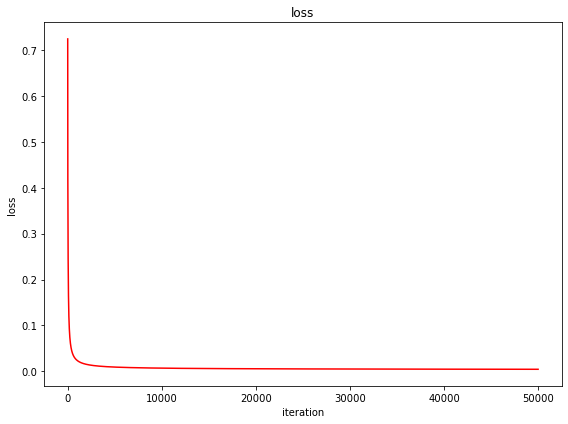

In [18]:
plot_loss_curve(loss1_iteration)

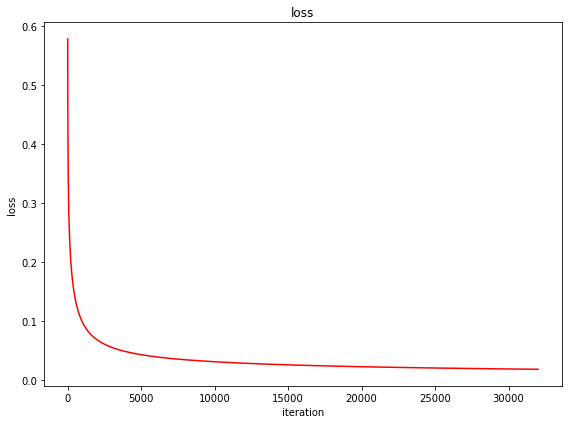

In [19]:
plot_loss_curve(loss2_iteration)

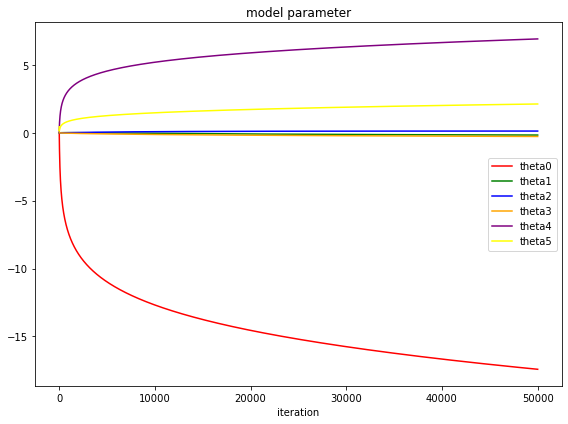

In [20]:
plot_model_parameter(theta1_iteration)

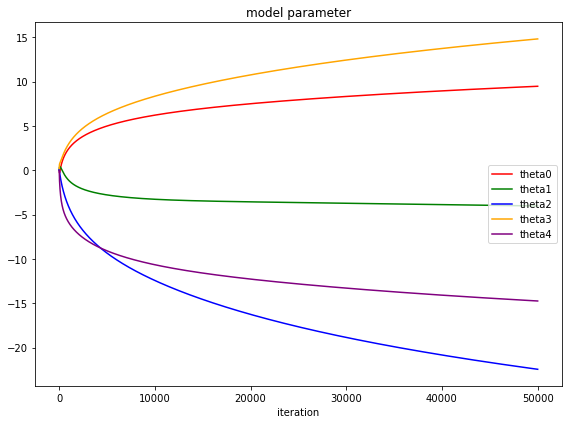

In [21]:
plot_model_parameter(theta2_iteration)

In [22]:
X0 = np.arange(-5, 5, 0.01)
X1 = np.arange(-5, 5, 0.01)
xx, yy = np.meshgrid(X0, X1)

zz1 = theta1[0] + theta1[1]*xx + theta1[2]*yy + theta1[3]*(xx*yy) + theta1[4]*(xx**2) + theta1[5]*(yy**2)

def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.contour(xx, yy, zz1, levels=[0] ,colors="black")
    plt.contourf(xx, yy, zz1, cmap='RdBu_r', vmin=zz1.min(), vmax=zz1.max(),levels=np.linspace(zz1.min(), zz1.max(), 70))
    
    plt.plot(data1_zero[:,0], data1_zero[:,1], '.', color = 'blue', label='class 0')
    plt.plot(data1_one[:,0], data1_one[:,1], '.', color = 'red', label='class 1') 
    
    plt.legend()
    plt.colorbar()
    plt.tight_layout()
    plt.show()

In [23]:
X0 = np.arange(-2, 3, 0.01)
X1 = np.arange(-2, 3, 0.01)
xx2, yy2 = np.meshgrid(X0, X1)
zz2 = theta2[0] + theta2[1]*xx2 + theta2[2]*(xx2**2) + theta2[3]*(xx2**3) + theta2[4]*yy2

def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.contour(xx2, yy2, zz2, levels=[0] ,colors="black")
    plt.contourf(xx2, yy2, zz2, cmap='RdBu_r', vmin=zz2.min(), vmax=zz2.max(),levels=np.linspace(zz2.min(), zz2.max(), 70))
    
    plt.plot(data2_zero[:,0], data2_zero[:,1], '.', color = 'blue', label='class 0')
    plt.plot(data2_one[:,0], data2_one[:,1], '.', color = 'red', label='class 1')

    plt.legend()
    plt.colorbar()
    plt.tight_layout()
    plt.show()

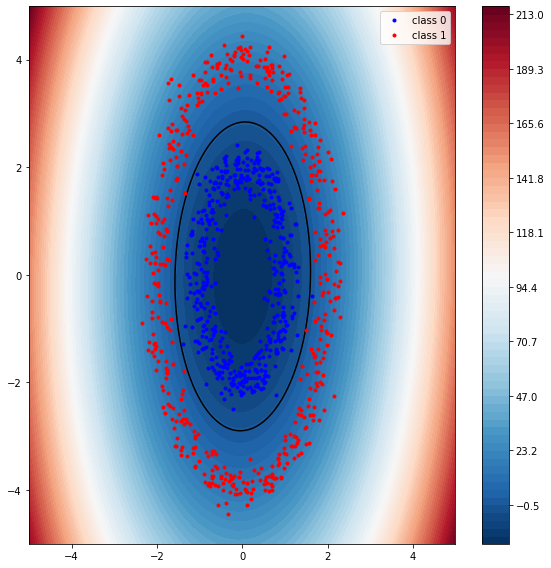

In [24]:
plot_classifier1(data1, theta1_optimal)

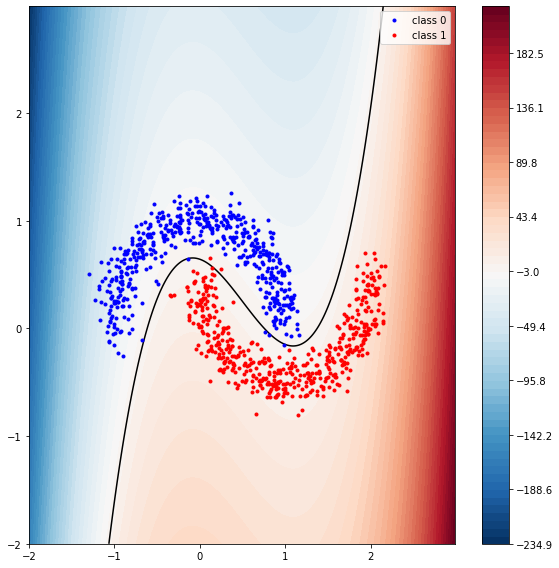

In [25]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

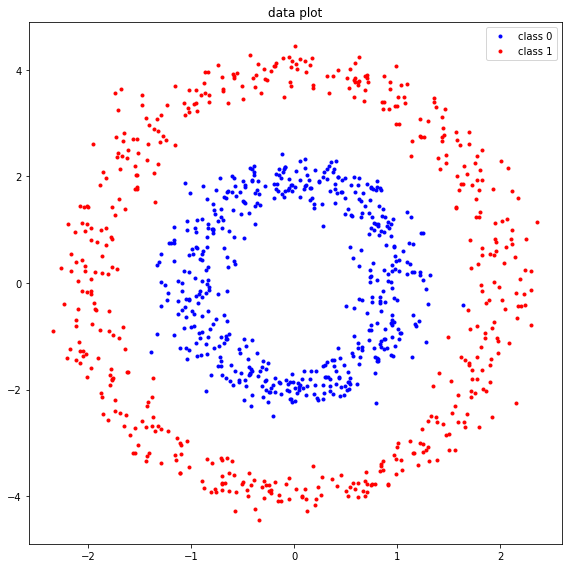

In [26]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

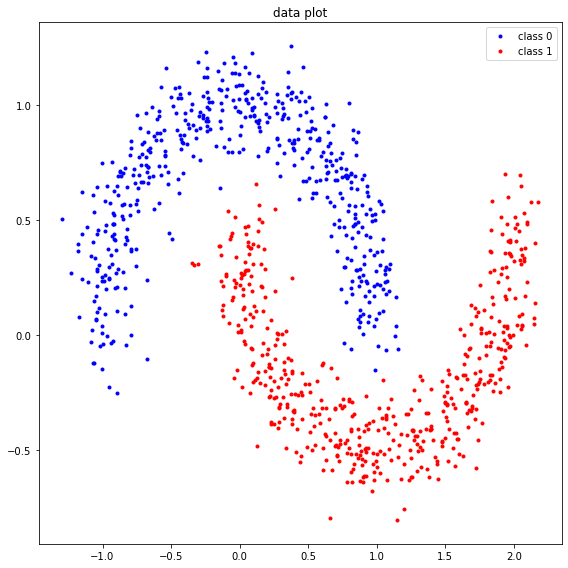

In [27]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

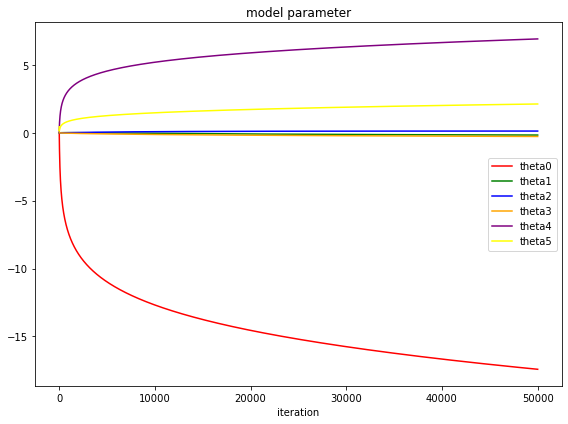

In [28]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

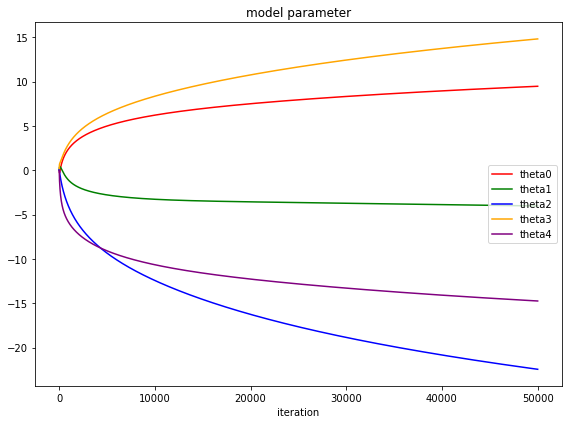

In [29]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

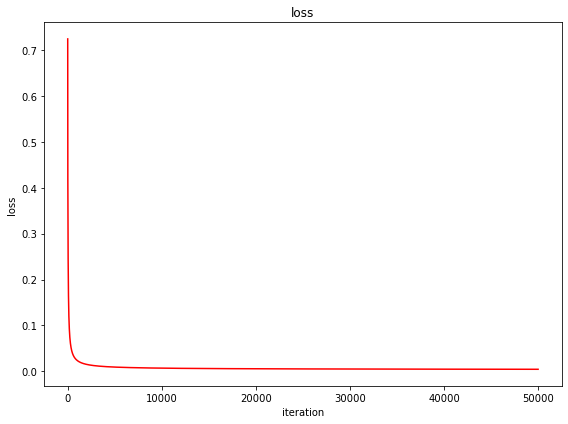

In [30]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

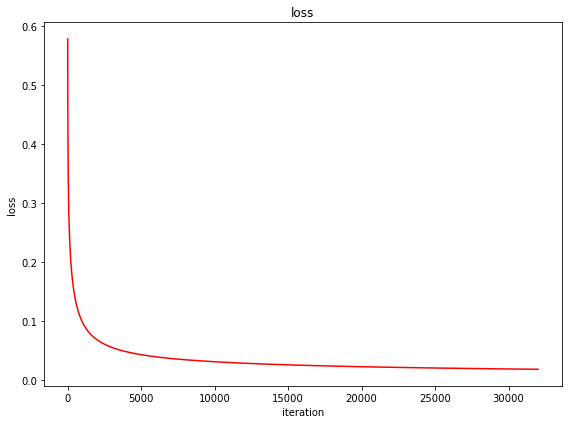

In [31]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

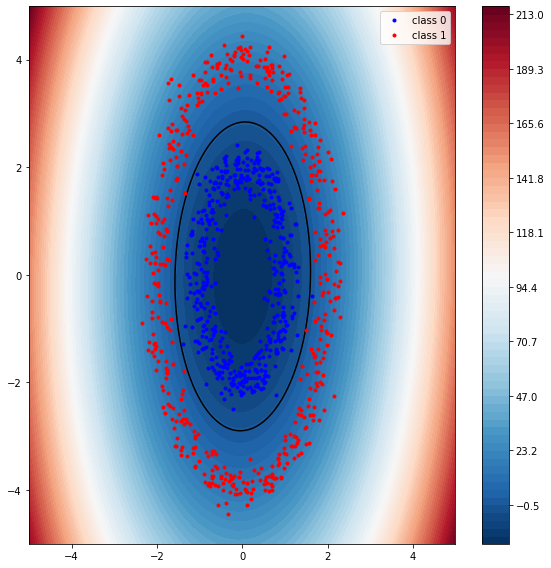

In [32]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

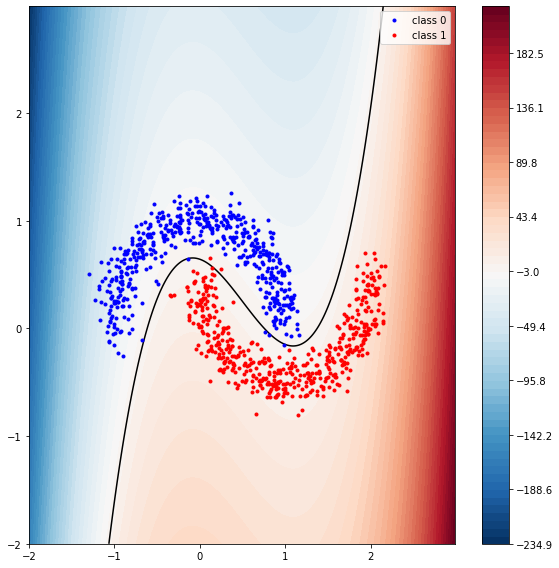

In [33]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [34]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [35]:
print(accuracy_classifier2)

0.994
